**엔씨소프트 '리니지' 게임 이탈 유저 분류 프로젝트**

* 1. 전처리 된 데이터 불러오기

In [1]:
import pandas as pd
df = pd.read_csv("c:/vscode/미니프로젝트/2_분류_프로젝트/data/total_train.csv")
df.head(5)

,acc_id,survive,amount_spent,sell_cnt,buy_cnt,playtime,npc_kill,solo_exp,party_exp,quest_exp,...,play_char_cnt,combat_char_cnt,pledge_combat_cnt,random_attacker_cnt_y,random_defender_cnt_y,same_pledge_cnt_y,temp_cnt_y,etc_cnt_y,combat_play_time,non_combat_play_time
0,2,1,0.000000,35.0,1.0,91.533663,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,5,0,0.000000,0.0,10.0,6.116132,3.236452,2.155434,0.695285,0.111055,...,5.557755,1.587930,0.000000,1.936569,0.929907,0.000000,2.570959,0.814001,5.097608,0.004402
2,8,1,1.404644,7.0,10.0,18.797802,31.172609,31.489136,0.000000,1.561055,...,201.306223,58.031626,2.717332,33.631748,21.745527,29.441536,92.455650,61.354404,136.879854,0.033823
3,17,1,0.000000,33.0,57.0,28.464708,30.456852,9.255848,8.823094,2.322365,...,71.312495,21.689681,0.486279,9.230979,10.872764,1.591434,36.784494,12.514373,65.693573,0.000000
4,20,1,0.896531,9.0,45.0,25.588043,34.100184,0.274902,0.080060,0.083483,...,54.891855,25.515149,7.964404,11.974452,6.580883,11.140041,28.379435,44.409036,66.451919,0.000000


* 2. 컬럼 분류

In [2]:
train_cols = df.columns[2:36]
X = df[train_cols]
y = df['survive']
print(train_cols)

Index(['amount_spent', 'sell_cnt', 'buy_cnt', 'playtime', 'npc_kill',
       'solo_exp', 'party_exp', 'quest_exp', 'rich_monster', 'death', 'revive',
       'exp_recovery', 'fishing', 'private_shop', 'enchant_count', 'level',
       'pledge_cnt', 'random_attacker_cnt_x', 'random_defender_cnt_x',
       'temp_cnt_x', 'same_pledge_cnt_x', 'etc_cnt_x', 'num_opponent',
       'play_char_cnt', 'combat_char_cnt', 'pledge_combat_cnt',
       'random_attacker_cnt_y', 'random_defender_cnt_y', 'same_pledge_cnt_y',
       'temp_cnt_y', 'etc_cnt_y', 'combat_play_time', 'non_combat_play_time'],
      dtype='object')


-> 종속변수가 불균형 데이터이므로, 언더샘플링 필요.

c:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, '분류/n (0: bad, 1:good)')

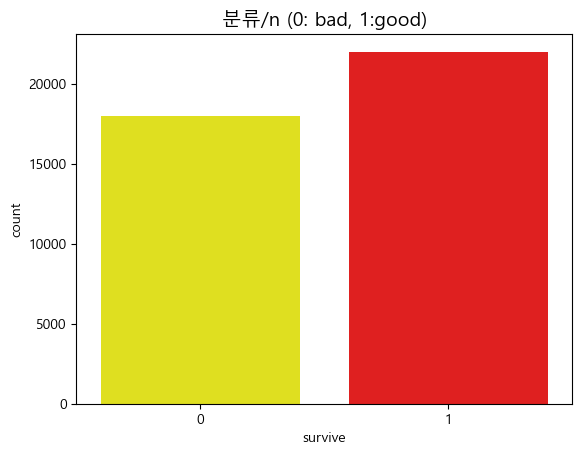

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
# 한글 폰트 설정
font_name = font_manager.FontProperties(fname='c:/Windows/Fonts/malgun.ttf').get_name()
rc('font', family=font_name)

# 불균형 데이터 시각화
import seaborn as sns
colors = ['yellow', 'red']
sns.countplot('survive', data=df, palette=colors)
plt.title('분류/n (0: bad, 1:good)', fontsize=14)

* 3. 언더샘플링

In [3]:
from imblearn.under_sampling import RandomUnderSampler

X_sample, y_sample = RandomUnderSampler(random_state=0).fit_resample(X,y)
X_samp = pd.DataFrame(data=X_sample, columns=train_cols)
y_samp = pd.DataFrame(data=y_sample, columns=['survive'])
df_samp = pd.concat([X_samp, y_samp], axis=1)
df_samp['survive'].value_counts()

0    18004
1    18004
Name: survive, dtype: int64

* 4. 독립변수, 종속변수 재지정

In [4]:
X=df_samp[train_cols]
y=df_samp["survive"]

------------------------------------

* 5. 변수 유효성 확인

In [33]:
import statsmodels.api as sm
model=sm.Logit(y,X)
result=model.fit()
print(result.summary2())
#모델의 설명력 13.4%
#citations 변수는 유의하지 않음 : combat_char_cnt, sell_cnt, random_attacker_cnt_x, amount_spent, same_pledge_cnt_x 

Optimization terminated successfully.
         Current function value: 0.600350
         Iterations 7
                            Results: Logit
Model:                 Logit             Pseudo R-squared:  0.134     
Dependent Variable:    survive           AIC:               43300.8163
Date:                  2023-04-24 09:33  BIC:               43581.0357
No. Observations:      36008             Log-Likelihood:    -21617.   
Df Model:              32                LL-Null:           -24959.   
Df Residuals:          35975             LLR p-value:       0.0000    
Converged:             1.0000            Scale:             1.0000    
No. Iterations:        7.0000                                         
----------------------------------------------------------------------
                       Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
----------------------------------------------------------------------
amount_spent           0.0051   0.0074   0.6922 0.4888 -0.0094  0.0196
sel

* 6. 알고리즘 비교 (GridSearchCV 이용)

In [9]:
#다양한 알고리즘별 정확도를 저장할 리스트
scores=[]

In [35]:
# 1) 로지스틱회귀분석
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('clf', LogisticRegression(random_state=0)),
])
params = {
    'clf__C': [0.0001, 0.001, 0.01, 0.1, 1.0, 10, 100],
}
grid = GridSearchCV(pipe, params, scoring='accuracy', cv=3)
grid.fit(X, y)
print(grid.best_params_)
print(grid.best_score_)

scores.append(grid.best_score_)

{'clf__C': 0.1}
0.7153410641951522


In [10]:
# 2) 의사결정나무
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('clf', DecisionTreeClassifier(random_state=0)),
])
params = {
    'clf__max_depth': list(range(3,6))
}
grid = GridSearchCV(pipe, params, scoring='accuracy', cv=3)
grid.fit(X, y)
print(grid.best_params_)
print(grid.best_score_)

scores.append(grid.best_score_)

{'clf__max_depth': 5}
0.7018718042628246


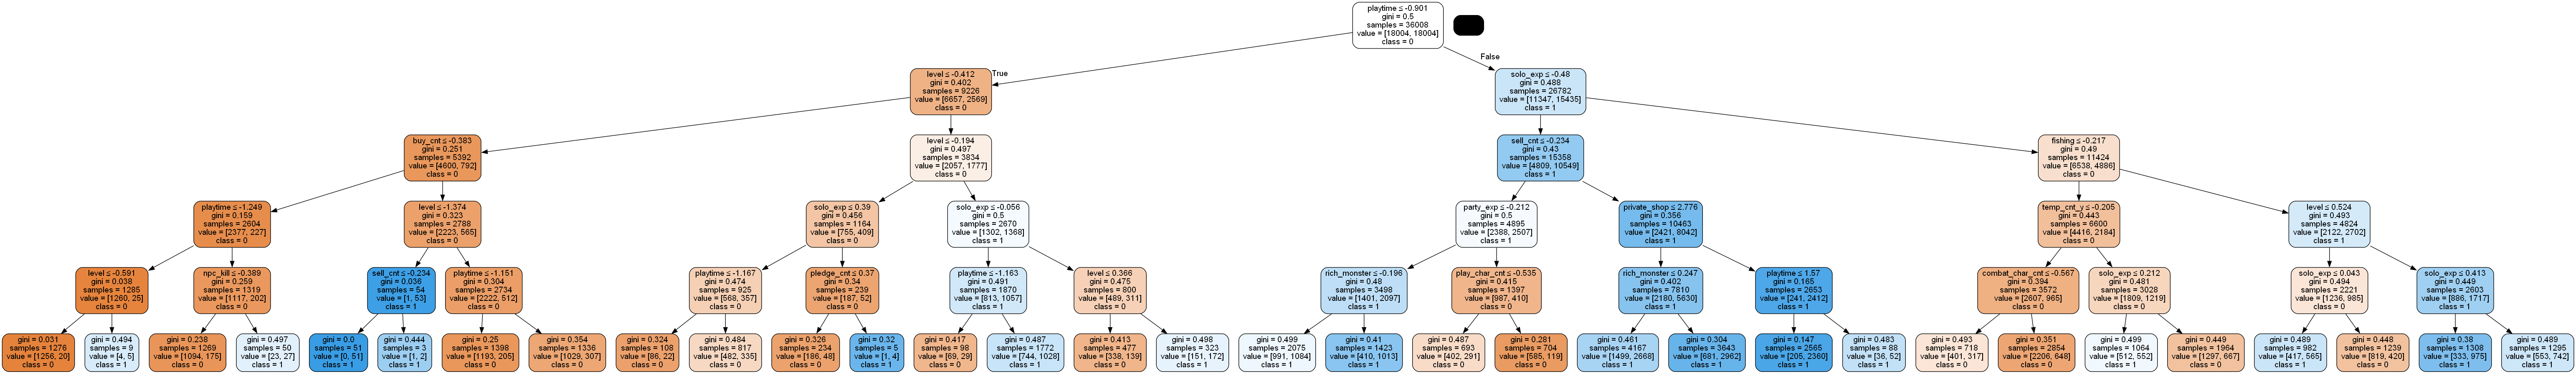

In [11]:
# 2-3) 트리모델 구성 그래프

tree = grid.best_estimator_['clf']

from sklearn.tree import export_graphviz
import pydotplus
import graphviz
from IPython.display import Image

dot_data = export_graphviz(tree, out_file=None,
        feature_names=train_cols, class_names=["0","1"], filled=True,
        rounded=True, special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

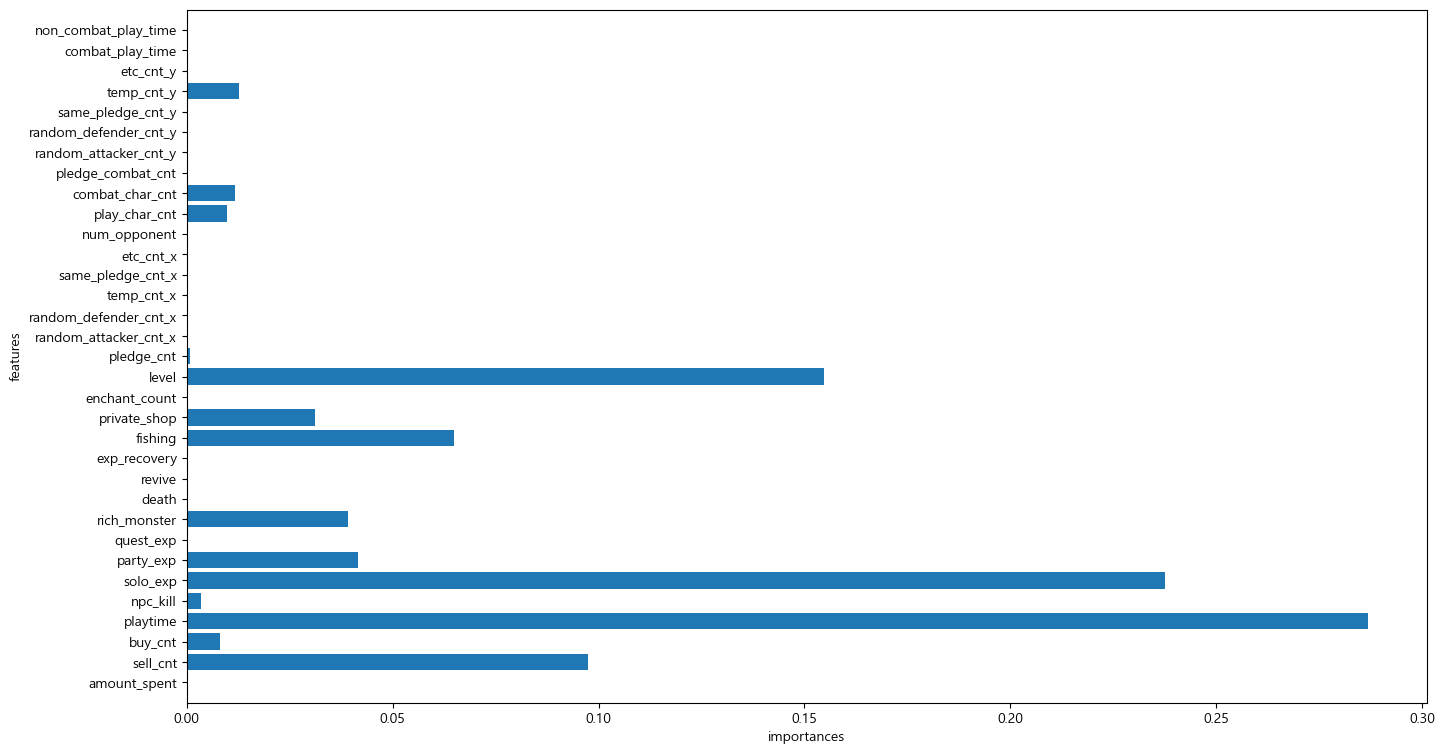

In [12]:
# 2-4) 특성 중요도
#트리를 만드는 결정에 각 특성이 얼마나 중요한지를 평가하는 특성 중요도 적용
#0~1 사이의 값(0 전혀 사용되지 않음 ~ 1 완벽하게 타겟 클래스 예측)

import numpy as np

def plot_tree(model):
    n_features = X.shape[1]
    plt.rcParams["figure.figsize"]=(16,9)
    plt.barh(range(n_features), model.feature_importances_,
                    align='center')
    plt.yticks(np.arange(n_features), train_cols)
    plt.xlabel("importances")
    plt.ylabel("features")
    plt.ylim(-1, n_features)
plot_tree(tree)
#특성 중요도 : playtime, solo_exp, level, party_exp, fishing

In [39]:
# 3) 랜덤포레스트
from sklearn.ensemble import RandomForestClassifier

pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('clf', RandomForestClassifier(random_state=0)),
])
params = {
    'clf__max_depth': list(range(3,6)),
    'clf__n_estimators': list(range(10,110,10)),
}
grid = GridSearchCV(pipe, params, scoring='accuracy', cv=3)
grid.fit(X, y)
print(grid.best_params_)
print(grid.best_score_)

scores.append(grid.best_score_)

{'clf__max_depth': 5, 'clf__n_estimators': 100}
0.7179515527716971


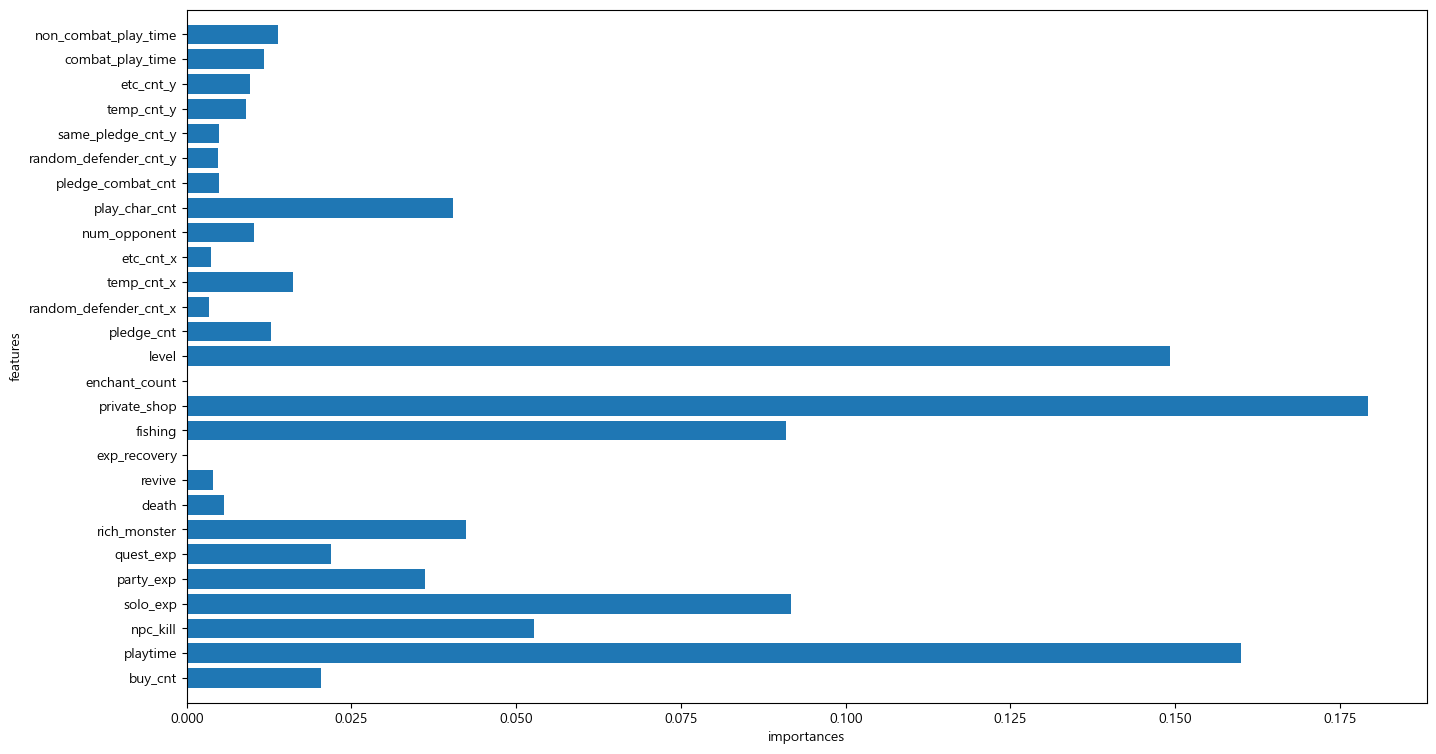

In [ ]:
# 3-3) 특성 중요도
rf=grid.best_estimator_['clf']
plot_tree(rf)
# private_shop, playtime, level, solo_exp, fishing

In [40]:
# 4) knn
from sklearn.neighbors import KNeighborsClassifier

pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('clf', KNeighborsClassifier()),
])
params = {
    'clf__n_neighbors': list(range(1,6)),
}
grid = GridSearchCV(pipe, params, scoring='accuracy', cv=3)
grid.fit(X, y)
print(grid.best_params_)
print(grid.best_score_)

scores.append(grid.best_score_)

c:\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
c:\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to a

{'clf__n_neighbors': 5}
0.7119250802567184


In [41]:
# 5) 인공신경망
from sklearn.neural_network import MLPClassifier

pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('clf', MLPClassifier(random_state=0, max_iter=5000)),
])
params = {
    'clf__hidden_layer_sizes': [(50,), (100,), (50,50), (100,100)],
    'clf__activation': ['tanh', 'relu'],
    'clf__alpha': [0.001, 0.01, 0.1]
}
grid = GridSearchCV(pipe, params, scoring='accuracy', cv=3)
grid.fit(X, y)
print(grid.best_params_)
print(grid.best_score_)

scores.append(grid.best_score_)

{'clf__activation': 'relu', 'clf__alpha': 0.1, 'clf__hidden_layer_sizes': (100,)}
0.7305042918481252


In [42]:
# 6) svm
from sklearn.svm import SVC

pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('clf', SVC(random_state=0)),
])
params = {
    'clf__C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
    'clf__gamma': [0.0001, 0.001, 0.01, 0.1],
}
grid = GridSearchCV(pipe, params, scoring='accuracy', cv=3)
grid.fit(X, y)
print(grid.best_params_)
print(grid.best_score_)

scores.append(grid.best_score_)

{'clf__C': 1, 'clf__gamma': 0.1}
0.7308930997360455


In [43]:
# 7) keras
from scikeras.wrappers import KerasClassifier
from keras import models
from keras import layers

def create_network(optimizer="rmsprop"):
    network = models.Sequential()
    network.add(layers.Dense(units=16, activation="relu",
    input_shape=(X.shape[1],)))
    # network.add(layers.Dense(units=16, activation="relu"))
    network.add(layers.Dense(units=1, activation="sigmoid"))
    network.compile(loss='binary_crossentropy',
                    optimizer=optimizer, # 옵티마이저
                    metrics=["accuracy"]) # 성능 지표
    return network

neural_network = KerasClassifier(model=create_network, verbose=0)
# 하이퍼파라미터 탐색 영역을 정의
pipe=Pipeline([
    ('scaler',StandardScaler()),
    ('clf',neural_network)
])
params={
    'clf__epochs': [50, 100],
    'clf__batch_size': [32,64],
    'clf__optimizer': ["rmsprop", "adam"],
}
grid=GridSearchCV(pipe,params,scoring='accuracy',cv=3)
grid.fit(X, y)
print(grid.best_params_)
print(grid.best_score_)

scores.append(grid.best_score_)

{'clf__batch_size': 32, 'clf__epochs': 100, 'clf__optimizer': 'rmsprop'}
0.728532511653512


* 7. 알고리즘별 예측도 그래프

['LOGIT', 'Tree', 'RF', 'KNN', 'ANN', 'SVM', 'DNN']
[0.71534106 0.7018718  0.71795155 0.71192508 0.73050429 0.7308931
 0.72853251]
최적의 모형: SVM
최고 정확도: 0.7308930997360455


Text(0, 0.5, 'Accuracy')

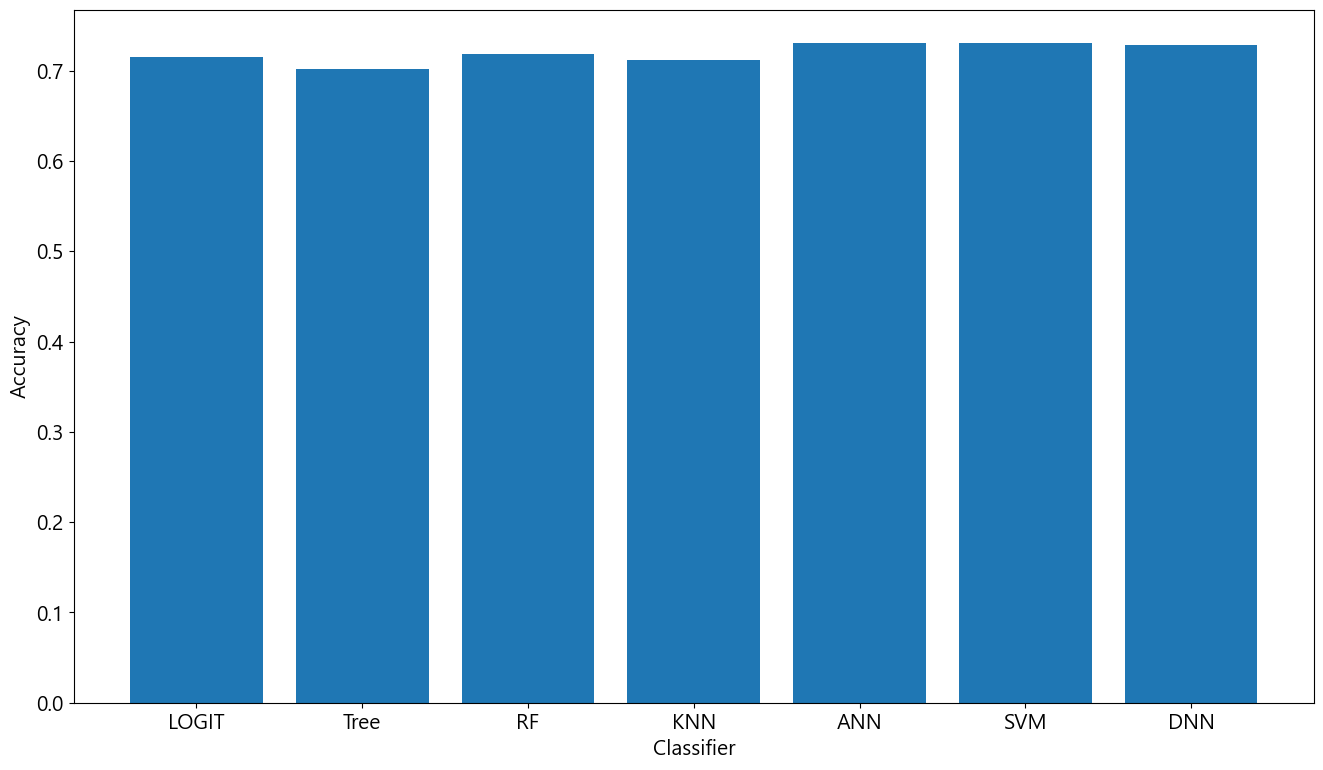

In [44]:
methods=["LOGIT","Tree","RF","KNN","ANN","SVM","DNN"]

scores_arr=np.array(scores) #검증용 데이터셋의 정확도
max_rate=np.max(scores_arr) #가장 좋은 정확도
idx=np.argmax(scores_arr) #최대값의 인덱스
print(methods)
print(scores_arr)
print("최적의 모형:",methods[idx])
print("최고 정확도:",max_rate)

plt.rcParams["font.size"]=15
plt.bar(methods, scores_arr)
plt.xlabel("Classifier")
plt.ylabel("Accuracy")

In [45]:
import statsmodels.api as sm
model= sm.OLS(y,X)
result=model.fit()
print(result.summary())
#모델의 설명력 %
#citations 변수는 유의하지 않음 : 

                                 OLS Regression Results                                
Dep. Variable:                survive   R-squared (uncentered):                   0.596
Model:                            OLS   Adj. R-squared (uncentered):              0.596
Method:                 Least Squares   F-statistic:                              1608.
Date:                Mon, 24 Apr 2023   Prob (F-statistic):                        0.00
Time:                        13:39:26   Log-Likelihood:                         -22297.
No. Observations:               36008   AIC:                                  4.466e+04
Df Residuals:                   35975   BIC:                                  4.494e+04
Df Model:                          33                                                  
Covariance Type:            nonrobust                                                  
                            coef    std err          t      P>|t|      [0.025      0.975]
------------------------------

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


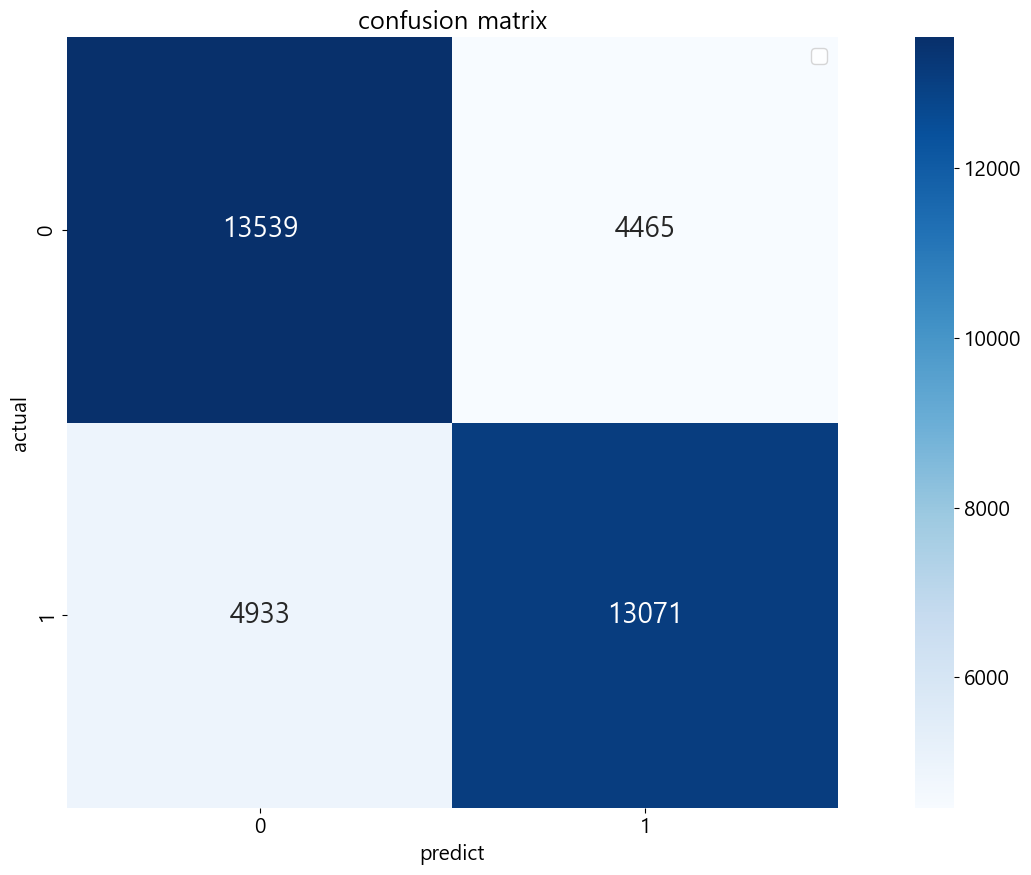

In [47]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

pred_y = grid.predict(X)
matrix = confusion_matrix(y, pred_y)

sns.heatmap(pd.DataFrame(matrix), annot=True, cmap='Blues', fmt='g',
            square=True, annot_kws={'size':20})
plt.title('confusion matrix')
plt.ylabel('actual')
plt.xlabel('predict')
plt.legend()
plt.tight_layout()
plt.show()

> 결합 모델

In [5]:
from sklearn.model_selection import train_test_split

#학습용, 검증용 구분
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=0)

In [30]:
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier

# model1 = SVC(C=1, gamma=0.1, random_state=1)
# model1 = LogisticRegression(random_state=0, C=0.1, max_iter=1000)
# model2 = DecisionTreeClassifier(random_state=0, max_depth=5)
model2 = RandomForestClassifier(max_depth=5, n_estimators=70, random_state=0)
model3 = KNeighborsClassifier(n_neighbors=5)
# model4 = MLPClassifier(random_state=0, hidden_layer_sizes=[100], activation='relu', alpha=0.1, max_iter=5000)
model5 = ExtraTreesClassifier(n_estimators=100, random_state=0)
# ensemble = VotingClassifier(estimators=[('lr', model1), ('dt', model2),
# ('knn', model3), ('mlp', model4), ('et',model5)], voting='soft')
ensemble = VotingClassifier(estimators=[('dt', model2),
('knn', model3), ('et',model5)], voting='soft')

ensemble.fit(X_train,y_train)
print("학습용:", ensemble.score(X_train, y_train))
print("검증용:", ensemble.score(X_test, y_test))

학습용: 0.9843435395403736
검증용: 0.7481255206886975


In [23]:
from sklearn.ensemble import ExtraTreesClassifier

model5 = ExtraTreesClassifier(n_estimators=100, random_state=0)
model5.fit(X_train,y_train)
print("학습용:", model5.score(X_train, y_train))
print("검증용:", model5.score(X_test, y_test))

학습용: 1.0
검증용: 0.7622882532629826


> 최고의 모형 사용한 결과

In [ ]:
#최고의 모형 : extratree > svm

In [31]:
import pandas as pd

df = pd.read_csv("c:/vscode/미니프로젝트/2_분류_프로젝트/data/total_train.csv")
df.head(5)

,acc_id,survive,amount_spent,sell_cnt,buy_cnt,playtime,npc_kill,solo_exp,party_exp,quest_exp,...,play_char_cnt,combat_char_cnt,pledge_combat_cnt,random_attacker_cnt_y,random_defender_cnt_y,same_pledge_cnt_y,temp_cnt_y,etc_cnt_y,combat_play_time,non_combat_play_time
0,2,1,0.000000,35.0,1.0,91.533663,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,5,0,0.000000,0.0,10.0,6.116132,3.236452,2.155434,0.695285,0.111055,...,5.557755,1.587930,0.000000,1.936569,0.929907,0.000000,2.570959,0.814001,5.097608,0.004402
2,8,1,1.404644,7.0,10.0,18.797802,31.172609,31.489136,0.000000,1.561055,...,201.306223,58.031626,2.717332,33.631748,21.745527,29.441536,92.455650,61.354404,136.879854,0.033823
3,17,1,0.000000,33.0,57.0,28.464708,30.456852,9.255848,8.823094,2.322365,...,71.312495,21.689681,0.486279,9.230979,10.872764,1.591434,36.784494,12.514373,65.693573,0.000000
4,20,1,0.896531,9.0,45.0,25.588043,34.100184,0.274902,0.080060,0.083483,...,54.891855,25.515149,7.964404,11.974452,6.580883,11.140041,28.379435,44.409036,66.451919,0.000000


In [32]:
train_cols = df.columns[2:36]
X = df[train_cols]
y = df['survive']

In [33]:
from imblearn.under_sampling import RandomUnderSampler

X_sample, y_sample = RandomUnderSampler(random_state=0).fit_resample(X,y)
X_samp = pd.DataFrame(data=X_sample, columns=train_cols)
y_samp = pd.DataFrame(data=y_sample, columns=['survive'])
df_samp = pd.concat([X_samp, y_samp], axis=1)
df_samp['survive'].value_counts()

0    18004
1    18004
Name: survive, dtype: int64

In [34]:
X=df_samp[train_cols]
y=df_samp["survive"]

In [35]:
from sklearn.model_selection import train_test_split

#학습용, 검증용 구분
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=0)

In [36]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [8]:
from sklearn.svm import SVC

model = SVC(C=1, gamma=0.1, random_state=10)
model.fit(X_train, y_train)

print(model.score(X_train, y_train))
print(model.score(X_test, y_test))

0.7864680969242519
0.7324354346014996


In [10]:
from sklearn.metrics import classification_report
print(classification_report(y_test, model.predict(X_test)))

              precision    recall  f1-score   support

           0       0.73      0.73      0.73      3601
           1       0.73      0.73      0.73      3601

    accuracy                           0.73      7202
   macro avg       0.73      0.73      0.73      7202
weighted avg       0.73      0.73      0.73      7202



In [39]:
from sklearn.ensemble import ExtraTreesClassifier

model = ExtraTreesClassifier(n_estimators=100, random_state=0)
model.fit(X_train,y_train)
print("학습용:", model.score(X_train, y_train))
print("검증용:", model.score(X_test, y_test))

학습용: 1.0
검증용: 0.7649264093307414


In [40]:
from sklearn.metrics import classification_report
print(classification_report(y_test, model.predict(X_test)))

              precision    recall  f1-score   support

           0       0.77      0.76      0.76      3601
           1       0.76      0.77      0.77      3601

    accuracy                           0.76      7202
   macro avg       0.76      0.76      0.76      7202
weighted avg       0.76      0.76      0.76      7202



In [6]:
from xgboost import XGBClassifier

clf = XGBClassifier()
clf.fit(X_train, y_train)
clf.predict(X_test)
clf.score(X_test, y_test)

0.7496528742016106

['LOGIT', 'Tree', 'RF', 'KNN', 'ANN', 'SVM', 'DNN', 'ET']
[0.71534106, 0.7018718, 0.71795155, 0.71192508, 0.73050429, 0.7308931, 0.72853251, 0.7649264]
최적의 모형: ET
최고 정확도: 0.7649264


Text(0, 0.5, 'Accuracy')

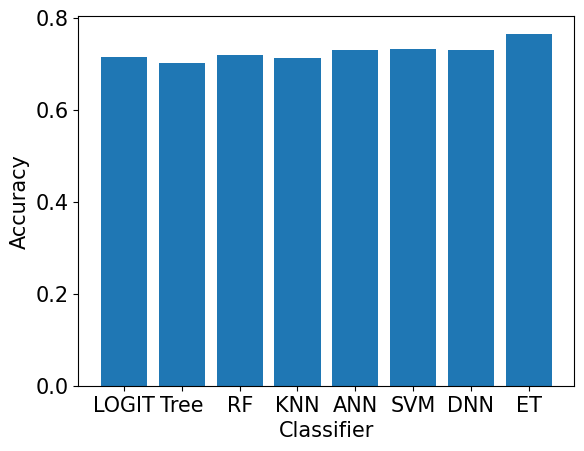

In [44]:
import numpy as np
import matplotlib.pyplot as plt

methods=["LOGIT","Tree","RF","KNN","ANN","SVM","DNN",'ET']

scores_arr=[0.71534106, 0.7018718, 0.71795155, 0.71192508, 0.73050429, 
            0.7308931, 0.72853251, 0.7649264] #검증용 데이터셋의 정확도
max_rate=np.max(scores_arr) #가장 좋은 정확도
idx=np.argmax(scores_arr) #최대값의 인덱스
print(methods)
print(scores_arr)
print("최적의 모형:",methods[idx])
print("최고 정확도:",max_rate)

plt.rcParams["font.size"]=15
plt.bar(methods, scores_arr)
plt.xlabel("Classifier")
plt.ylabel("Accuracy")

In [41]:
#모형을 지정한 디렉토리에 저장
import joblib
joblib.dump(model, 'c:/vscode//미니프로젝트/2_분류_프로젝트/best_model_total..joblib')

['c:/vscode//미니프로젝트/2_분류_프로젝트/best_model_total..joblib']

In [ ]:
import joblib

# 저장된 SVC 모델 불러오기
model = joblib.load('svc_model.joblib')

# 불러온 모델 사용하기
y_pred = model.predict(X_test)